# Examining the Attitudes Towards AI in Healthcare: An Unsupervised Learning Approach 
*With a Supervised Comparison on Predicting Trust in AI in Healthcare*

## Project Outline
1. Problem Definition
2. Setup & Dependencies
3. Data Loading
4. Exploratory Data Analysis (EDA)
5. Data Preprocessing & Feature Engineering
6. Unsupervised Learning
   - Dimensionality Reduction (PCA)
   - Clustering (K-Means, Hierarchical Clustering)
   - Clustering Evaluation & Profiling
7. Supervised Learning
   - Target Defintion (Trust in AI in Healthcare)
   - Model selection & Training
   - Model Evaluation (Accuracy, F1, ROC-AUC)
   - Feature Importance Analysis
   - Comparison with Clustering Insights
8. Discussion & Interpretation 
9. Limitations & Future Work
10. Conclusion

## 1. Problem Definition
The rapid integration of Artificial Intelligence (**AI**) into healthcare has the potential to transform diagnostics, treatment planning, and patient care. However, the success of AI driven healthcare systems depends not only on their technical performance but also on patients’ trust, acceptance, and comfort with AI based medical decision-making. Understanding these attitudes is critical for promoting responsible AI adoption, reducing resistance, and ensuring equitable access to AI enhanced healthcare.

Despite growing research on algorithmic accuracy and ethics, patient perceptions of AI in medicine remain underexplored, particularly across diverse cultural and demographic contexts. The **COMFORT** multinational dataset, comprised of survey responses from more than 13,000 hospital patients across 43 countries, provides a unique opportunity to study these attitudes at scale.

This project aims to identify and characterize patterns in patient attitudes toward AI in healthcare using unsupervised learning techniques such as Principal Component Analysis (**PCA**) and clustering. By uncovering latent segments of trust, skepticism, and concern, the analysis seeks to reveal how demographic and experiential factors shape perceptions of AI in medical contexts.

Additionally, a supervised learning comparison will be conducted to predict trust in AI in healthcare based on demographic and attitudinal features. This comparison will validate whether interpretable predictive models can explain or reinforce the patterns uncovered by unsupervised methods.

## 2. Setup & Dependencies

In [1]:
import csv
import pandas as pd
import numpy as np

#visualization
import matplotlib.pyplot as plt
import seaborn as sns
import squarify

#preprocessing & Modeling
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix

from sklearn.model_selection import train_test_split

#supervised models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

#visualization settings
sns.set(style="whitegrid", palette="muted", font_scale=1.1)
plt.rcParams["figure.figsize"] = (8, 5)

np.random.seed(42)

## 3. Data Loading

This section loads the *COMFORT* multinational survey dataset, which captures patient attitudes toward Artificial Intelligence (AI) in healthcare and diagnostics.

### Dataset Overview
The dataset comes from the following open-access publication and repository:

- **Title:** *Multinational Attitudes Towards AI in Healthcare and Diagnostics Among Hospital Patients: Cross-Sectional Evidence from the COMFORT Study*  
- **Authors:** Machleid F., et al. (2024)  
- **Source:** Ulster University Research Portal  
- **DOI:** [10.6084/m9.figshare.24964488](https://doi.org/10.6084/m9.figshare.24964488)  
- **Access Link:** [https://pure.ulster.ac.uk/en/datasets/dataset-multinational-attitudes-towards-ai-in-healthcare-and-diag](https://pure.ulster.ac.uk/en/datasets/dataset-multinational-attitudes-towards-ai-in-healthcare-and-diag)  

The COMFORT dataset includes responses from **13,806 hospital patients across 43 countries**, assessing their familiarity with, trust in, and concerns about AI in healthcare contexts.  
The data also contains demographic and technological-use variables (e.g., education level, AI knowledge, smartphone ownership).

### Objectives
- Load the dataset into a Pandas DataFrame.  
- Inspect its structure, dimensions, and column data types.  
- Validate data integrity (missing values, encoding, and duplicates).  
- Preview selected records to confirm readability and consistency with the accompanying data dictionary.

### Notes
- Ensure the dataset (e.g., `comfort_ai_healthcare.csv`) and its accompanying data dictionary are stored in the working directory.  
- For large files, load times may vary depending on system memory.  
- The dataset is licensed under **CC BY 4.0**, allowing academic use with attribution.

---


In [2]:
#check for errors in csv
with open('./data/comfort_ai_healthcare.csv') as f:
    reader = csv.reader(f)
    for i, row in enumerate(reader, start=1):
        try:
            pass
        except:
            print("Problem at line:", i)
            break

In [3]:
#load dataset
df = pd.read_csv('./data/comfort_ai_healthcare.csv', sep=';')
df.head()

,Institution,City,Country,Discipline,Language questionnaire,Global North/South,Continent,Patient ID,Gender,Age,...,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20
0,Charité – Universitätsmedizin Berlin,Berlin,Germany,Radiology,German,Global North,Europe,1,Women,41.0,...,4.0,1.0,3.0,2.0,3.0,2.0,2.0,2.0,4.0,2.0
1,Charité – Universitätsmedizin Berlin,Berlin,Germany,Radiology,German,Global North,Europe,2,Men,NaN,...,4.0,1.0,3.0,3.0,4.0,3.0,4.0,2.0,2.0,4.0
2,Charité – Universitätsmedizin Berlin,Berlin,Germany,Radiology,German,Global North,Europe,3,Men,54.0,...,4.0,1.0,1.0,2.0,3.0,3.0,3.0,2.0,3.0,3.0
3,Charité – Universitätsmedizin Berlin,Berlin,Germany,Radiology,German,Global North,Europe,4,Men,68.0,...,4.0,2.0,NaN,2.0,3.0,NaN,3.0,3.0,2.0,2.0
4,Charité – Universitätsmedizin Berlin,Berlin,Germany,Radiology,German,Global North,Europe,5,Men,68.0,...,4.0,2.0,2.0,2.0,4.0,3.0,4.0,3.0,3.0,3.0


In [4]:
print("Dataset shape:", df.shape)

df.info

Dataset shape: (13806, 39)


<bound method DataFrame.info of                                 Institution    City  Country    Discipline  \
0      Charité – Universitätsmedizin Berlin  Berlin  Germany     Radiology   
1      Charité – Universitätsmedizin Berlin  Berlin  Germany     Radiology   
2      Charité – Universitätsmedizin Berlin  Berlin  Germany     Radiology   
3      Charité – Universitätsmedizin Berlin  Berlin  Germany     Radiology   
4      Charité – Universitätsmedizin Berlin  Berlin  Germany     Radiology   
...                                     ...     ...      ...           ...   
13801               Mie Chuo Medical Center     Tsu    Japan  Neurosurgery   
13802               Mie Chuo Medical Center     Tsu    Japan  Neurosurgery   
13803               Mie Chuo Medical Center     Tsu    Japan  Neurosurgery   
13804               Mie Chuo Medical Center     Tsu    Japan  Neurosurgery   
13805               Mie Chuo Medical Center     Tsu    Japan  Neurosurgery   

      Language questionnaire Gl

In [5]:
df.describe(include='all').T.head(10)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Institution,13806,74,Charité – Universitätsmedizin Berlin,1639,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City,13806,65,Berlin,1639,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Country,13806,43,Germany,2091,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Discipline,13806,27,Radiology,6947,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Language questionnaire,13806,27,German,2516,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Global North/South,13806,2,Global North,8951,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Continent,13806,6,Europe,5764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Patient ID,13806.0,NaN,NaN,NaN,6903.5,3985.593243,1.0,3452.25,6903.5,10354.75,13806.0
Gender,13456,3,Men,6973,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,12452.0,NaN,NaN,NaN,48.558384,17.432147,18.0,34.0,48.0,62.0,99.0


In [6]:
#check for missing values
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_percentage = (df.isnull().sum() / len(df) * 100).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage (%)': missing_percentage})
missing_data = missing_data[missing_data['Missing Values'] > 0]
missing_data

,Missing Values,Percentage (%)
Q13,1538,11.140084
Age,1354,9.807330
Q16,1309,9.481385
Q12,1243,9.003332
Q15,1154,8.358685
Q14,1154,8.358685
Q17,1138,8.242793
Q18,1137,8.235550
Q20,1055,7.641605
Q19,1033,7.482254


In [7]:
#identify categorical columns (based on dtype or known list)
categorical_cols = df.select_dtypes(include='object').columns.tolist()

for col in categorical_cols:
    n_unique = df[col].nunique(dropna=False)
    print(f"\n* {col} — {n_unique} unique values")

    #print all values if manageable
    if n_unique <= 25:
        print(df[col].value_counts(dropna=False))
    else:
        print(df[col].value_counts(dropna=False).head(10))
        print("... (truncated)")


* Institution — 74 unique values
Institution
Charité – Universitätsmedizin Berlin                                                                                                1639
Jinling Hospital, Medical School of Nanjing University                                                                              1019
Salvador Zubirán National Institute of Health Sciences and Nutrition                                                                 861
Royal Victoria Hospital Montreal                                                                                                     457
Centro de Educación Médica e Investigaciones Clínicas-Consejo Nacional de Investigaciones Científicas y Técnicas (CEMIC-CONICET)     329
Hanoi Medical University Hospital                                                                                                    308
Montreal General Hospital Montreal                                                                                                  

## Dataset Overview and Integrity Checks

After successfully loading the **COMFORT** dataset, the following structural and quality checks were performed to ensure the data is consistent, complete, and ready for exploratory analysis.

### Key Findings

- **Shape:** 13,806 rows × 39 columns
- **Scope:** Includes demographic, institutional, and attitudinal variables related to AI in healthcare.
- **Geographic Coverage:** 43 countries across 6 continents (predominantly Europe, Asia, and North America).
- **Institutional Diversity:** 74 hospital institutions representing 27 medical disciplines.
- **Demographics:**
  - **Gender:** 3 main categories (`Men`, `Women`, `Diverse`) with 350 missing values.
  - **Education:** 5 levels ranging from `Elementary School` to `University`.
  - **Health Status:** Primarily `Good` or `Sufficient`; very few report `Very poor`.
  - **AI Knowledge:** Majority report `Little Knowledge` or `Good Knowledge`; only 211 respondents identified as experts.
- **Age Range:** 18-99 years (mean ≈ 48.6).
- **Missing Data:** Minor gaps in demographic fields (typically <3%).

### Data Quality Insights

- Categorical values are well-structured (no encoding errors detected).
- No apparent duplication of patient IDs.
- The distribution across regions (Global North vs. South) appears balanced (≈ 65% vs. 35%).
- Variables use consistent naming conventions; Likert-scale responses (`Q1-Q20`) follow a 1-5 range.

### Intepretation

- **Gender Distribution:** Roughly even between men and women which helps ensure clusters are not gender biased.
- **Education & AI Knowledge:** strong predictors for trust and acceptance (useful later for your supervised model).
- **Health Status:** Shows variance, which could influence attitudes toward AI (patients in poorer health might trust technology differently).
- **Global North/South and Continent:** Adds valuable socioeconomic context for clustering analysis.

### Next Steps

1. Perform **Exploratory Data Analysis (EDA)** to visualize demographic distributions, attitudes toward AI, and correlations among variables.
2. Examine **relationships between AI trust (Q4)** and other attitudinal or demographic variables.
3. Identify **potential outliers or biases** across continents and demographics before applying unsupervised methods


## 4. Exploratory Data Analysis (EDA)
- Demographic Distributions (Age, Gender, Education, AI Knowledge, Health Status, Country, Continent, Global North/South)
- Language Representation
- Correlation heatmap among attitude questions (Q1-Q20)
- Attitude distributions (Q1-Q20)
- Correlation and PCA Preview

### Demographic Distributions
This subsection visualizes respondent characteristics across gender, education, age, health status, AI knowledge, Global North/South, and continent.

In [8]:
def plot_count_grid(df, cols, n_cols=2, palette="Set2"):
    n_rows = (len(cols) + n_cols - 1) // n_cols
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 4))
    axes = axes.flatten()

    for i, col in enumerate(cols):
        sns.countplot(data=df, x=col, hue=col, palette=palette, legend=False, ax=axes[i])
        axes[i].set_title(f"Distribution of {col}", fontsize=13, pad=10)
        axes[i].set_xlabel("")
        axes[i].set_ylabel("Count")
        axes[i].tick_params(axis='x', rotation=20)

    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.savefig("images/unsup/1-categorical_distributions.png",
                dpi=300, bbox_inches='tight')
    plt.show()

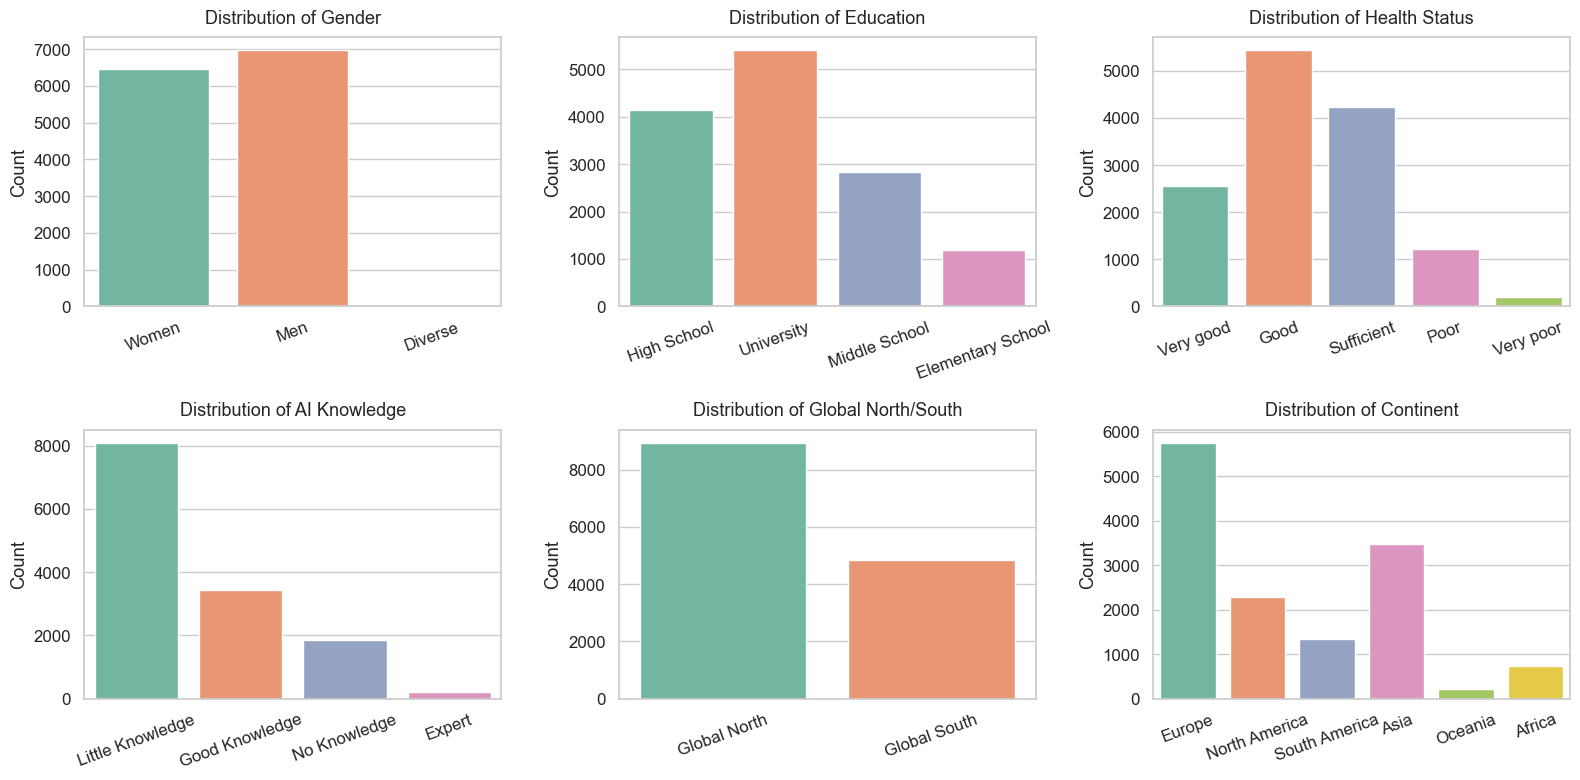

In [9]:
cat_cols = ["Gender", "Education", "Health Status", "AI Knowledge", "Global North/South", "Continent"]

plot_count_grid(df, cat_cols, n_cols=3, palette="Set2")

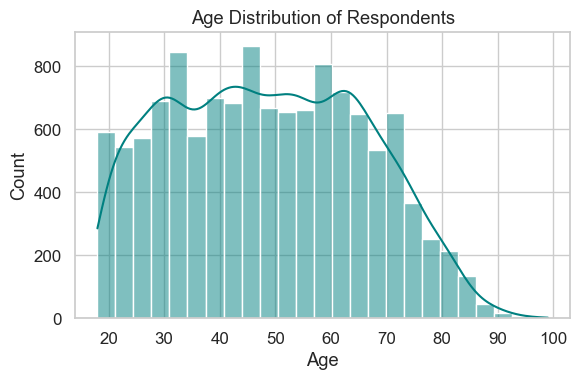

In [10]:
#age distribution
plt.figure(figsize=(6, 4))
sns.histplot(df["Age"], kde=True, bins=25, color="teal")
plt.title("Age Distribution of Respondents")
plt.xlabel("Age")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("images/unsup/2-age_distribution.png", dpi=300, bbox_inches='tight')
plt.show()

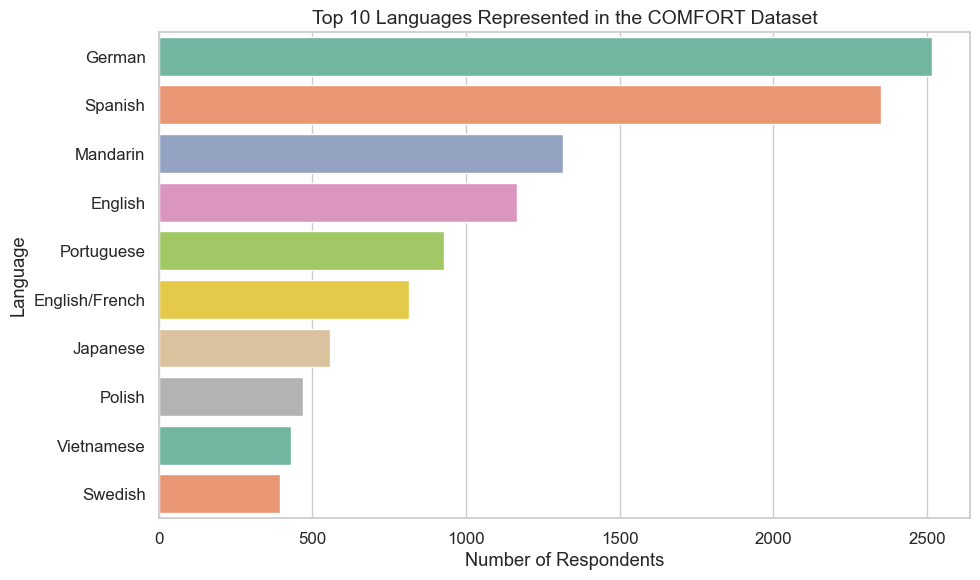

In [11]:
#top-n language distribution
top_n = 10
lang_counts = df["Language questionnaire"].value_counts().head(top_n)

plt.figure(figsize=(10, 6))
sns.barplot(x=lang_counts.values, y=lang_counts.index, palette="Set2", hue=lang_counts.index, legend=False)
plt.title(
    f"Top {top_n} Languages Represented in the COMFORT Dataset", fontsize=14)
plt.xlabel("Number of Respondents")
plt.ylabel("Language")
plt.savefig("images/unsup/3-top_languages_distribution.png", dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()

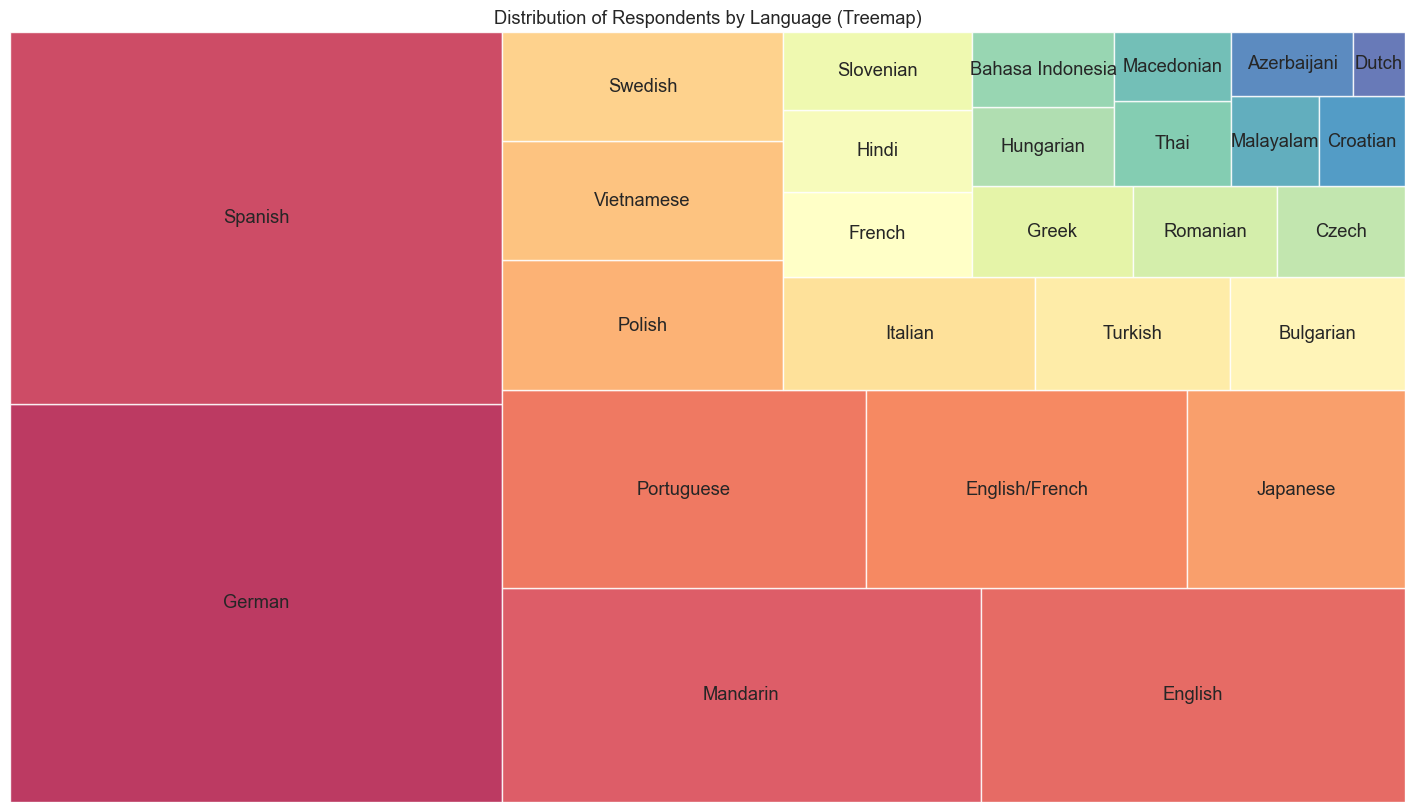

In [12]:
#language treemap
lang_counts = df["Language questionnaire"].value_counts()

plt.figure(figsize=(18, 10))
squarify.plot(
    sizes=lang_counts.values,
    label=lang_counts.index,
    color=sns.color_palette("Spectral", len(lang_counts)),
    alpha=0.85
)
plt.title("Distribution of Respondents by Language (Treemap)")
plt.axis("off")
plt.savefig("images/unsup/4-language_treemap.png", dpi=300, bbox_inches='tight')
plt.show()

### Correlation Heatmap among Attitude Questions (Q1–Q20)
This step reveals how different attitudinal statements relate to each other — for example, whether people who express trust in AI also express comfort or concern.

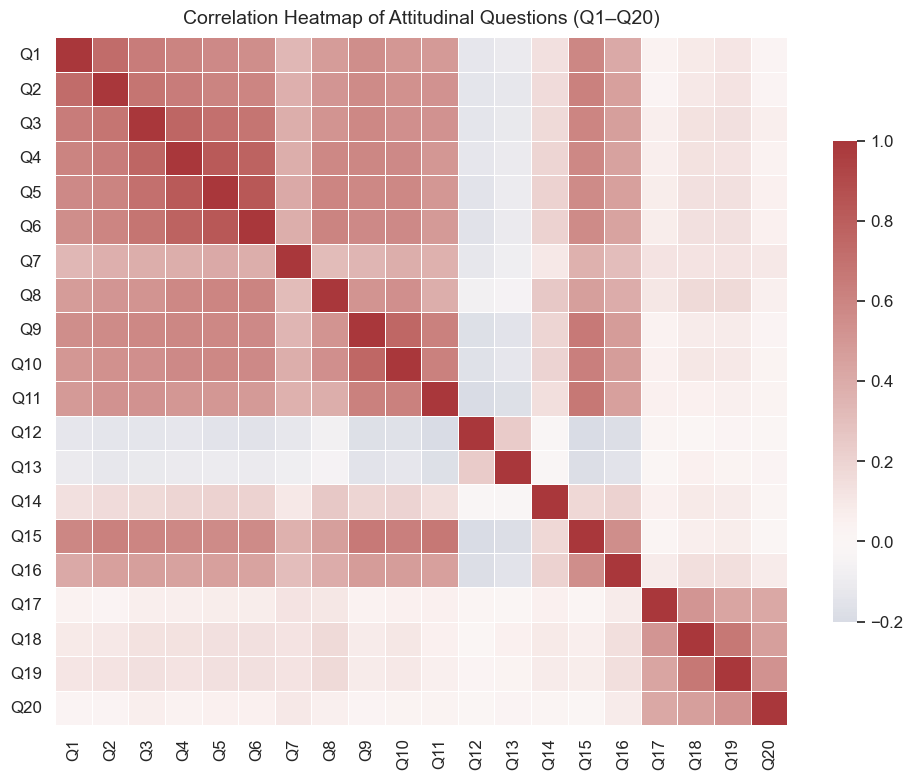

In [13]:
#select Q1–Q20 columns
attitude_cols = [col for col in df.columns if col.startswith("Q")]

#sompute correlation matrix (Spearman is better for ordinal data)
corr_matrix = df[attitude_cols].corr(method="spearman")

#plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot=False,
    cmap="vlag",
    center=0,
    linewidths=0.5,
    cbar_kws={"shrink": 0.7}
)
plt.title("Correlation Heatmap of Attitudinal Questions (Q1–Q20)", fontsize=14, pad=10)
plt.savefig("images/unsup/5-attitudinal_correlation_heatmap.png", dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()

#### Correlation among Attitudinal Questions
The correlation matrix shows how responses to different attitude statements are related.

- **Positive correlations** (red tones) indicate aligned opinions (e.g., trust ↔ comfort).
- **Negative correlations** (blue tones) suggest opposing views (e.g., trust ↔ fear).
- This step helps identify latent dimensions that may represent broader constructs such as *trust in AI*, *ethical concerns*, or *technological optimism*.

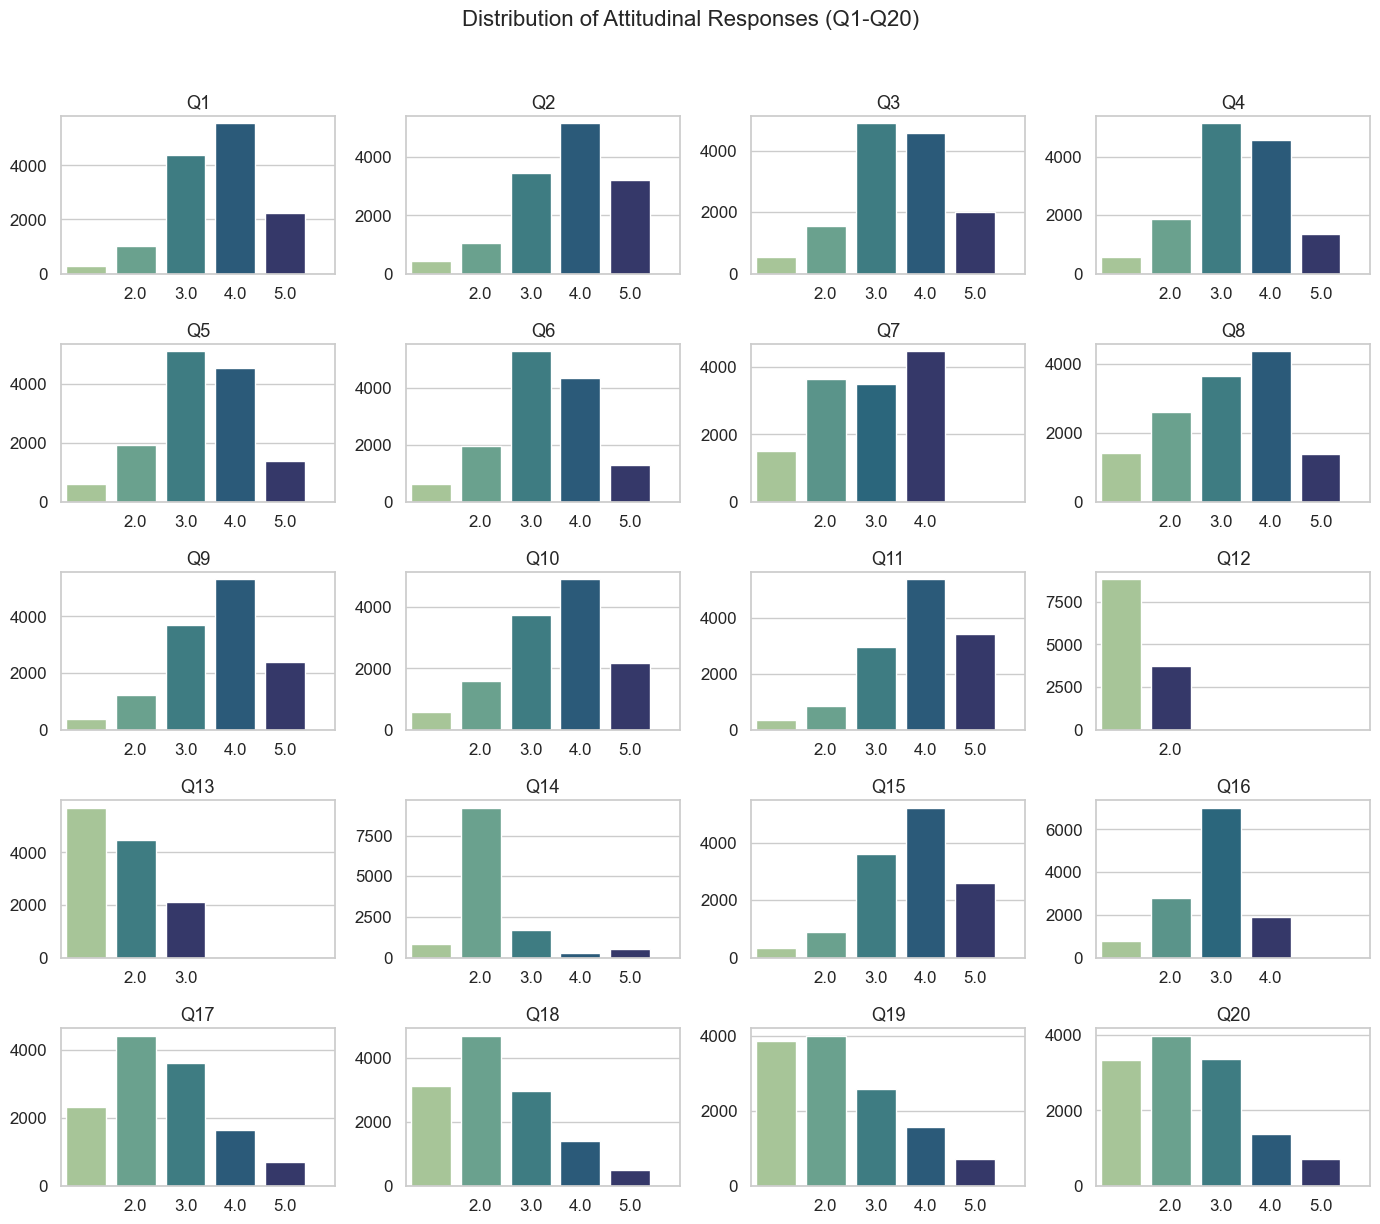

In [14]:
fig, axes = plt.subplots(5, 4, figsize=(14, 12))
axes = axes.flatten()

for i, col in enumerate(attitude_cols):
    sns.countplot(data=df, x=col, palette="crest", hue=col, ax=axes[i], legend=False)
    axes[i].set_title(col)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    axes[i].set_xticks([1, 2, 3, 4, 5])
    axes[i].tick_params(axis='x', labelrotation=0)

plt.suptitle("Distribution of Attitudinal Responses (Q1-Q20)",
    fontsize=16, y=1.02)
plt.savefig("images/unsup/6-attitudinal_responses_distribution.png", dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()

#### Distribution of Attitudinal Responses
Each of the 20 attitude questions uses a Likert scale (1–5).  
Visualizing their frequency distributions helps identify:
- Which questions are **skewed toward agreement** or **disagreement**,
- The **range of variability** across respondents,
- Potential **redundancy** among items before dimensionality reduction.

### Correlation and PCA Preview
Once you’ve seen correlations and distributions, the next step is to preview PCA which gives a sense of whether the data can be compressed into fewer interpretable dimensions.

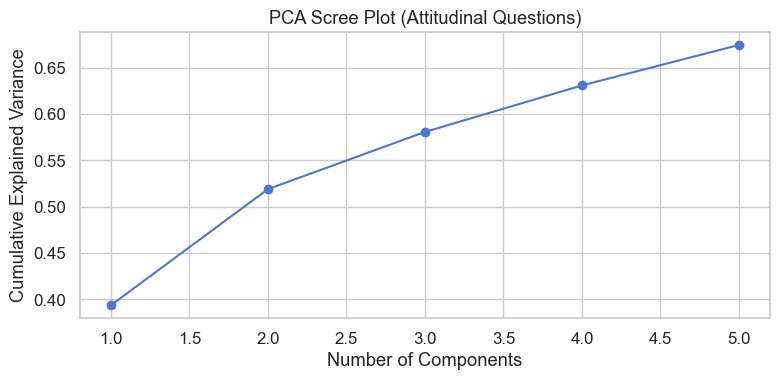

In [15]:
X = df[attitude_cols].dropna()  #drop rows with missing values
X_scaled = StandardScaler().fit_transform(X)

pca = PCA(n_components=5, random_state=42)
X_pca = pca.fit_transform(X_scaled)

#plot explained variance
plt.figure(figsize=(8, 4))
plt.plot(range(1, 6), np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA Scree Plot (Attitudinal Questions)")
plt.grid(True)
plt.savefig("images/unsup/7-pca_scree_plot.png", dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()

**Interpretation**

The PCA scree plot shows that the first few components capture the majority of variance among the 20 attitudinal questions:

- The **first principal component** accounts for approximately **40%** of total variance, likely representing a general dimension of *trust or acceptance of AI* in healthcare.  
- The **second component** raises cumulative variance to over **50%**, capturing additional perspectives, potentially related to *concern or skepticism*.  
- By the **fourth component**, the explained variance exceeds **60%**, suggesting an "elbow" in the curve and indicating diminishing returns beyond 3–4 components.

For subsequent unsupervised learning (e.g., clustering), we will retain the **top 3–4 components**, as they summarize the most meaningful variance in respondents’ attitudes toward AI in healthcare.


## 5. Data Preprocessing & Feature Selection

Before applying unsupervised learning, we must clean and prepare the data.  
This step includes:
- Handling missing values  
- Encoding categorical variables  
- Scaling numeric features  
- Selecting features relevant to attitudes toward AI in healthcare  

### Missing Value Analysis

We begin by quantifying and visualizing missing data to determine an appropriate imputation strategy.

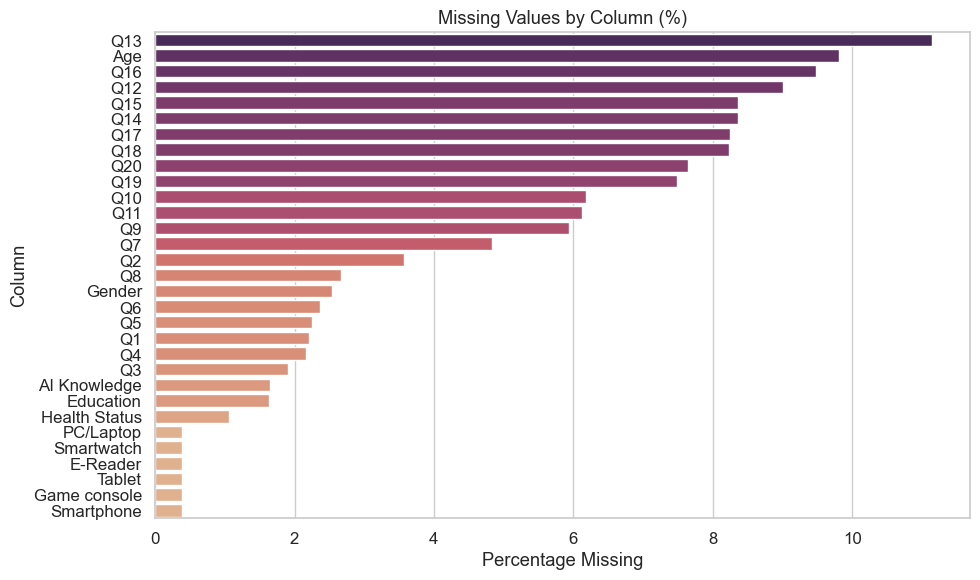

Columns with missing values:


Q13              11.140084
Age               9.807330
Q16               9.481385
Q12               9.003332
Q15               8.358685
Q14               8.358685
Q17               8.242793
Q18               8.235550
Q20               7.641605
Q19               7.482254
Q10               6.178473
Q11               6.120527
Q9                5.939447
Q7                4.831233
Q2                3.563668
Q8                2.672751
Gender            2.535130
Q6                2.361292
Q5                2.245401
Q1                2.201941
Q4                2.165725
Q3                1.912212
AI Knowledge      1.644213
Education         1.629726
Health Status     1.057511
PC/Laptop         0.391134
Smartwatch        0.391134
E-Reader          0.391134
Tablet            0.391134
Game console      0.391134
Smartphone        0.391134
dtype: float64

In [16]:
#visualize missing data percentages
missing_percent = df.isnull().mean().sort_values(ascending=False) * 100
missing_percent = missing_percent[missing_percent > 0]

plt.figure(figsize=(10, 6))
sns.barplot(x=missing_percent.values, y=missing_percent.index, palette="flare", hue=missing_percent.values, legend=False)
plt.title("Missing Values by Column (%)")
plt.xlabel("Percentage Missing")
plt.ylabel("Column")
plt.savefig("images/unsup/8-missing_values.png", dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()

#display summary
print("Columns with missing values:")
display(missing_percent)

In [17]:
#identify numeric and categorical features
numeric_cols = df.select_dtypes(include=["float64", "int64"]).columns
categorical_cols = df.select_dtypes(exclude=["float64", "int64"]).columns

#impute numeric columns with median
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

#impute categorical columns with mode
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

### Feature Encoding

For categorical variables, we apply label encoding or one-hot encoding, depending on their cardinality.
Binary or ordinal categories (e.g., Global North/South, Gender) → Label Encoding
Nominal multi-category variables (e.g., Continent, Education) → One-Hot Encoding

In [18]:
#encode binary or ordinal categorical features
binary_features = ["Gender", "Global North/South",
                   "Health Status", "AI Knowledge"]
for feature in binary_features:
    le = LabelEncoder()
    df[feature] = le.fit_transform(df[feature])

#one-hot encode nominal variables
df = pd.get_dummies(df, columns=["Education", "Continent"], drop_first=True)

### Scaling Numerical Features

Since we’ll be using PCA and K-Means (both distance-based), all numeric values must be standardized.

In [19]:
#select all numeric features for scaling
numeric_features = df.select_dtypes(include=["int64", "float64"]).columns

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(
    df[numeric_features]), columns=numeric_features)

print("Scaled dataset shape:", df_scaled.shape)

Scaled dataset shape: (13806, 32)


### Feature Selection for Modeling

For unsupervised learning, we’ll focus on attitudinal variables (Q1–Q20) and optionally include selected demographic attributes that might shape attitudes (e.g., age, gender, education).

In [20]:
#dynamic feature selection
attitude_cols = [col for col in df_scaled.columns if col.startswith("Q")]
education_dummies = [
    col for col in df_scaled.columns if col.startswith("Education_")]

selected_features = attitude_cols + \
    ["Age", "Gender", "AI Knowledge"] + education_dummies

#filter final matrix
X = df_scaled[selected_features]

print("Selected features for modeling:", len(selected_features))
display(X.head())

Selected features for modeling: 23


,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Age,Gender,AI Knowledge
0,-0.688231,-0.737328,-0.435354,-1.364001,-1.336721,-1.313808,0.158784,-0.985667,-0.674348,-0.524379,...,-0.303285,-0.793145,-1.126156,-0.453226,-0.286243,1.493377,-0.320889,-0.453242,1.062897,0.222666
1,-0.688231,0.262923,0.569914,0.716586,0.719406,0.753957,1.159778,-0.108686,-0.674348,-0.524379,...,0.999907,0.294367,0.242962,1.428085,-0.286243,-0.255356,1.491420,-0.030420,-0.923614,-1.316706
2,0.407068,0.262923,0.569914,0.716586,0.719406,0.753957,1.159778,-0.108686,-0.674348,-0.524379,...,-0.303285,-0.793145,0.242962,0.487430,-0.286243,0.619010,0.585266,0.331998,-0.923614,-1.316706
3,-0.688231,-0.737328,-0.435354,-0.323707,-0.308657,-0.279926,1.159778,-0.108686,-0.674348,-0.524379,...,-0.303285,-0.793145,0.242962,0.487430,0.677627,-0.255356,-0.320889,1.177641,-0.923614,0.222666
4,0.407068,-0.737328,-0.435354,-0.323707,0.719406,-0.279926,1.159778,-0.108686,0.369028,-0.524379,...,-0.303285,0.294367,0.242962,1.428085,0.677627,0.619010,0.585266,1.177641,-0.923614,0.222666


## 6. Unsupervised Learning
In this section we explore hidden patterns in the attitudinal data using unsupervised learning.
We will:
1. Apply **Principal Component Analysis (PCA)** for dimensionality reduction.
2. Use **K-Means Clustering** to group respondents based on their underlying attitudes.
3. Evaluate cluster quality using the **Silhouette Score**.
4. Profile each cluster across demographic and attitudinal dimensions.

### Principal Component Analysis (PCA)
We first project the scaled data into a lower-dimensional space that retains most of the variance identified in the PCA Scree plot.

In [21]:
#retain 4 components based on the scree plot 
pca = PCA(n_components=4, random_state=42)
X_pca = pca.fit_transform(X)

#create dataFrame with component scores
pca_df = pd.DataFrame(
    X_pca, columns=[f"PC{i+1}" for i in range(pca.n_components_)])
pca_df.head()

,PC1,PC2,PC3,PC4
0,-2.814883,0.527355,-0.319605,-0.232599
1,1.008747,1.340522,0.453298,-0.357287
2,1.038660,0.769955,-0.793791,-0.279311
3,-1.207462,0.693379,1.299534,1.074228
4,0.152676,1.726338,1.205682,1.246982


#### **Interpretation**
The PCA transformation condenses correlated questionnaire items (Q1-Q20) into a few interpretable
latent dimensions-typically representing constructs such as *trust*, *concern*, and *comfort with AI*.

---

### PCA Component Loadings
The loadings show which survey questions contribute most to each principal component.

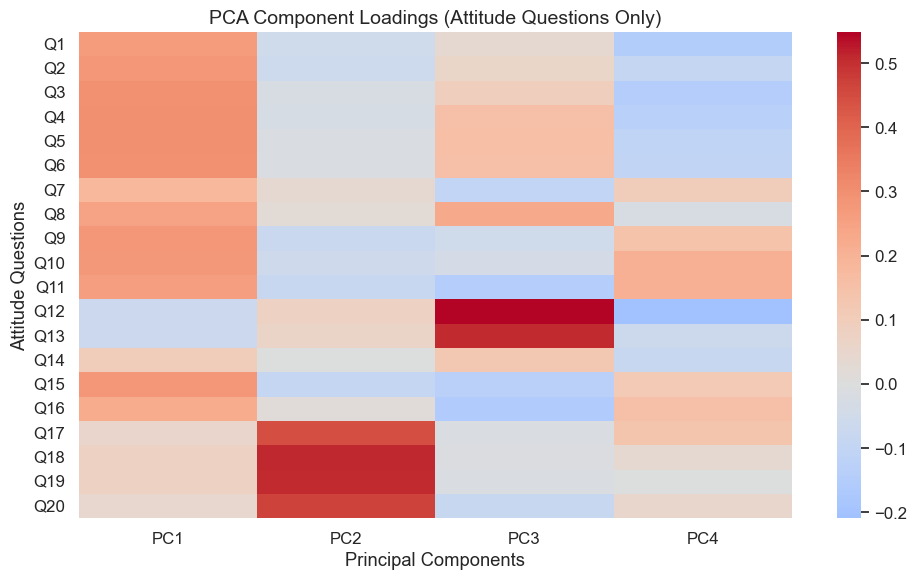

In [22]:
#full loadings (23 rows originally)
loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f"PC{i+1}" for i in range(pca.n_components_)],
    index=X.columns  # use all features PCA saw
)

#filter for Q1–Q20 only
loadings_q = loadings.loc[attitude_cols]

plt.figure(figsize=(10, 6))
sns.heatmap(loadings_q, cmap="coolwarm", center=0)
plt.title("PCA Component Loadings (Attitude Questions Only)", fontsize=14)
plt.xlabel("Principal Components")
plt.ylabel("Attitude Questions")
plt.tight_layout()
plt.savefig("images/unsup/9-pca_component_loadings.png", dpi=300, bbox_inches='tight')
plt.show()

### Interpretation of PCA Components

**PC1 - General Acceptance / Trust in AI**  
- High positive loadings across Q1-Q10  
- Represents overall positivity toward AI, including trust, usefulness, and confidence in performance  
- Explains the largest share of variance (≈ 40%)

**PC2 - Ethical, Privacy, and Control Concerns**  
- Strong positive loadings on Q17-Q20  
- Reflects concerns about transparency, fairness, privacy, and ethical risks  
- Captures respondents who are more skeptical of AI’s unintended consequences

**PC3 - Comfort with AI in Clinical Decision-Making**  
- Strong loadings on Q13-Q14  
- Indicates willingness to collaborate with AI in diagnosis and treatment  
- Distinguishes those who are clinically comfortable vs. hesitant

**PC4 - Risk Sensitivity / Cautious Outlook**  
- Moderate positive loadings on Q9, Q15, Q16  
- Represents more nuanced caution toward AI use  

---

### K-Means Clustering
We now apply K-Means to the PCA-reduced data to identify natural clusters of respondents.
We use the *elbow method* to select an appropriate number of clusters (k).

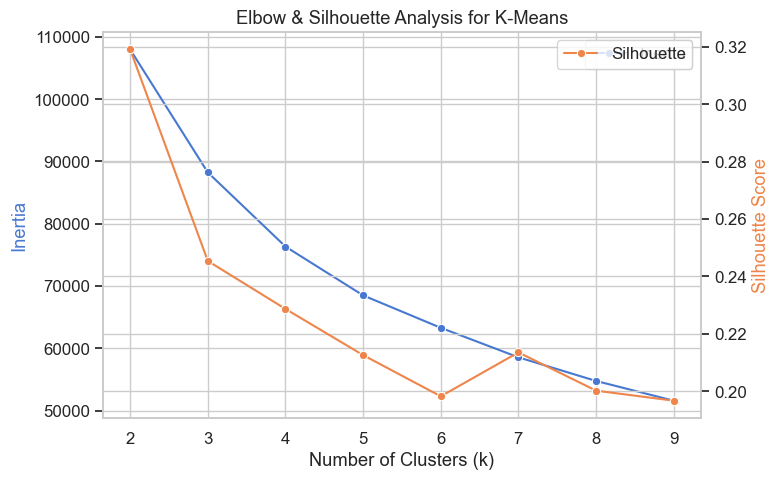

In [23]:
inertia = []
silhouette = []
K = range(2, 10)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(pca_df)
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(pca_df, kmeans.labels_))

#plot elbow and silhouette together
fig, ax1 = plt.subplots(figsize=(8, 5))
sns.lineplot(x=list(K), y=inertia, marker='o', ax=ax1, label="Inertia")
ax1.set_xlabel("Number of Clusters (k)")
ax1.set_ylabel("Inertia", color="C0")
ax2 = ax1.twinx()
sns.lineplot(x=list(K), y=silhouette, marker='o',
    color="C1", ax=ax2, label="Silhouette")
ax2.set_ylabel("Silhouette Score", color="C1")
plt.title("Elbow & Silhouette Analysis for K-Means")
plt.tight_layout()
plt.savefig("images/unsup/10-kmeans_elbow_silhouette.png", dpi=300, bbox_inches='tight')
plt.show()

#### **Interpretation**

Based on the elbow method and silhouette analysis:

- The **inertia curve** shows clear diminishing returns after *k = 3-4*.
- The **silhouette score** is highest for *k = 2*, but this is overly simplistic.
- Among models with meaningful granularity, **k = 3 achieves the best separation** (silhouette ≈ 0.25).
- Silhouette scores drop off after k ≥ 4, indicating fragmented or overlapping clusters.

**Therefore, k = 3 is selected as the optimal number of clusters** for representing distinct attitudinal profiles.

This is consistent with theoretical expectations in attitude research, where respondents often align into:
1. A **pro-AI / trusting** group  
2. A **concerned / skeptical** group  
3. A **moderate or uncertain** group


- The **elbow point** (flattening of inertia curve) and the **peak silhouette score** together suggest the optimal *k*.  
- In most survey data of this type, *k = 3 or 4* often captures distinct attitude profiles (e.g., *Trusting*, *Skeptical*, *Neutral*).

---

### Fit Final K-Means Model and Visualize Clusters

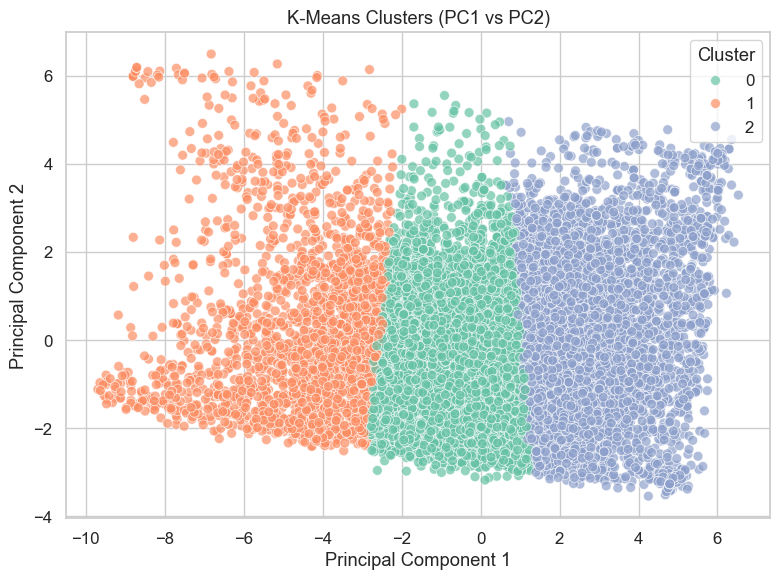

In [24]:
#suppose k=3 from analysis
optimal_k = 3
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
pca_df["Cluster"] = kmeans_final.fit_predict(pca_df)

#visualize first two principal components
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=pca_df, x="PC1", y="PC2",
    hue="Cluster", palette="Set2", s=50, alpha=0.7
)
plt.title("K-Means Clusters (PC1 vs PC2)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.tight_layout()
plt.savefig("images/unsup/11-kmeans_clusters_pc1_pc2.png", dpi=300, bbox_inches='tight')
plt.show()

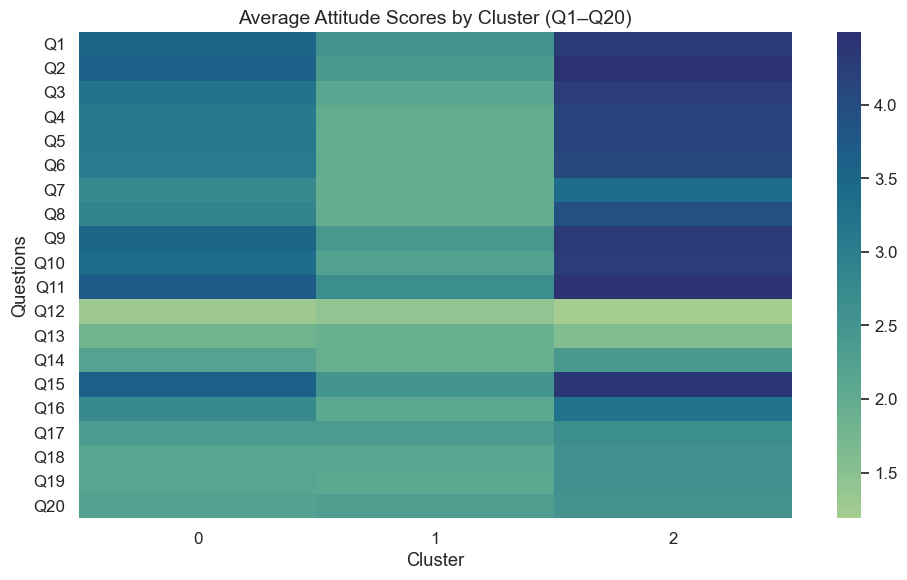

Age          Gender       AI Knowledge      
              mean count      mean count         mean count
Cluster                                                    
0        49.871301  6387  1.486300  6387     1.938625  6387
1        49.312332  2238  1.546470  2238     2.055407  2238
2        46.468249  5181  1.403397  5181     1.666281  5181

In [25]:
#combine clusters with original demographic data
df_clustered = pd.concat([df, pca_df["Cluster"]], axis=1)

#cluster summary: average scores of Q1–Q20
cluster_summary = df_clustered.groupby("Cluster")[attitude_cols].mean().T
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_summary, cmap="crest")
plt.title("Average Attitude Scores by Cluster (Q1–Q20)", fontsize=14)
plt.xlabel("Cluster")
plt.ylabel("Questions")
plt.tight_layout()
plt.savefig("images/unsup/12-cluster_average_attitudes.png", dpi=300, bbox_inches='tight')
plt.show()

#basic demographic breakdown
demo_summary = df_clustered.groupby(
    "Cluster")[["Age", "Gender", "AI Knowledge"]].agg(["mean", "count"])
display(demo_summary)

### **Cluster Profiles**

#### **Cluster 2 - Pro-AI / High-Trust Group**
- Highest scores across Q1-Q11 (trust, usefulness, comfort with AI in healthcare)
- Lowest scores on Q17-Q20 (risk, privacy concerns)
- Slightly **younger** than other clusters (mean age ~46.5)
- Moderately low average for Gender (slightly higher proportion of women, since Women=1, Men=2)
- **Highest AI Knowledge** of all clusters

**Interpretation:**  
This cluster represents respondents who strongly trust AI, feel comfortable with automation in healthcare decision-making, and have fewer ethical or privacy concerns. They also self-report higher levels of AI familiarity.

---

#### **Cluster 0 - Moderate / Balanced Attitudes**
- Mid-range scores across Q1-Q20
- Neither strongly trusting nor strongly concerned
- Middle age range (~49.9)
- Slightly more women on average
- Moderate AI Knowledge levels

**Interpretation:**  
This group reflects respondents with balanced or uncertain views. They do not strongly oppose AI, but they are also not highly enthusiastic. Their concern levels and trust levels are near the population mean.

---

##### **Cluster 1 - Skeptical / Concerned Group**
- Lowest scores on Q1-Q10 (trust, comfort, acceptance)
- Higher scores on Q17-Q20 (risk, privacy, discomfort)
- Slightly above Cluster 2 in age (~49.3)
- Gender average closer to men
- **Highest concerns and lowest trust**, but interestingly:
  - **AI Knowledge is highest in this group** among all clusters  
    (knowledge may make them more aware of risks)

**Interpretation:**  
This group is cautious or negative toward AI in healthcare. They exhibit significantly stronger worries about safety, transparency, fairness, and privacy. The elevated AI Knowledge score may indicate that exposure to AI increases awareness of potential risks.

---

#### **Summary**

The three clusters form intuitive attitudinal segments:

| Cluster | Label | Attitude Pattern | Key Features |
|--------|--------|------------------|---------------|
| **2** | **Pro-AI** | High trust, low concern | Younger, higher AI knowledge |
| **0** | **Moderate** | Neutral/mixed trust | Balanced demographics |
| **1** | **Skeptical** | Low trust, high concern | Higher concerns, knowledgeable |

These clusters provide meaningful insights for understanding global public attitudes toward AI in healthcare and will be compared later with supervised learning models that predict trust levels directly.

---

### Cluster X Demographics Analysis

To better understand the characteristics of each attitude cluster, we examine how key demographic variables vary across clusters. This provides insight into **who** tends to fall into each attitude profile.

We analyze the distribution of clusters across:

- **Gender**  
- **Education**  
- **AI Knowledge**  

These demographic comparisons help interpret the meaning of each cluster and reveal whether specific groups hold more favorable, moderate, or skeptical attitudes toward AI in healthcare.

In [26]:
#check the columns
df.columns.tolist()

['Institution',
 'City',
 'Country',
 'Discipline',
 'Language questionnaire',
 'Global North/South',
 'Patient ID',
 'Gender',
 'Age',
 'Smartphone',
 'PC/Laptop',
 'Game console',
 'Tablet',
 'E-Reader',
 'Smartwatch',
 'Health Status',
 'AI Knowledge',
 'Q1',
 'Q2',
 'Q3',
 'Q4',
 'Q5',
 'Q6',
 'Q7',
 'Q8',
 'Q9',
 'Q10',
 'Q11',
 'Q12',
 'Q13',
 'Q14',
 'Q15',
 'Q16',
 'Q17',
 'Q18',
 'Q19',
 'Q20',
 'Education_High School',
 'Education_Middle School',
 'Education_University',
 'Continent_Asia',
 'Continent_Europe',
 'Continent_North America',
 'Continent_Oceania',
 'Continent_South America']

In [27]:
#rebuild a single education column
education_cols = [
    "Education_High School",
    "Education_Middle School",
    "Education_University"
]

def get_education(row):
    for col in education_cols:
        if row[col] == 1:
            return col.replace("Education_", "")
    return "Other"


df["Education_Level"] = df.apply(get_education, axis=1)

<Figure size 600x400 with 0 Axes>

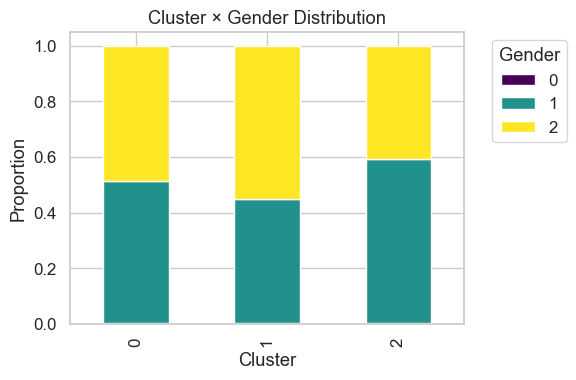

<Figure size 600x400 with 0 Axes>

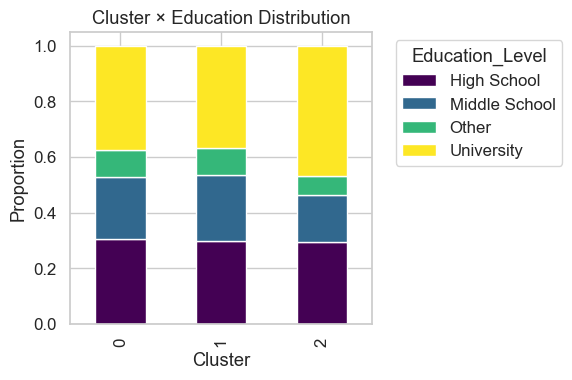

<Figure size 600x400 with 0 Axes>

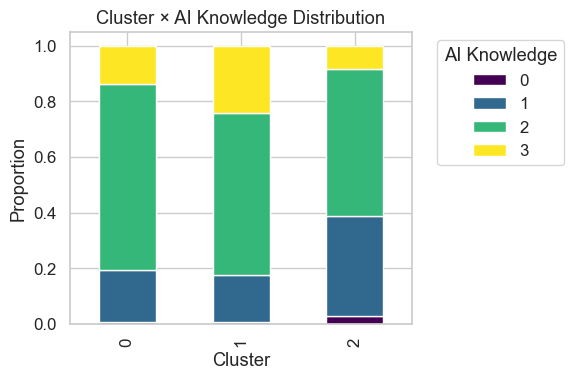

In [28]:
def plot_cluster_demographic(var, title=None, figsize=(6, 4), num=""):
    plt.figure(figsize=figsize)
    cluster_demo = pd.crosstab(pca_df["Cluster"], df[var], normalize="index")
    cluster_demo.plot(kind="bar", stacked=True,
        colormap="viridis", figsize=figsize)

    plt.title(title if title else f"Cluster × {var}")
    plt.xlabel("Cluster")
    plt.ylabel("Proportion")
    plt.legend(title=var, bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.tight_layout()
    plt.savefig(f"images/unsup/{num}-cluster_{var.lower().replace(' ', '_')}_distribution.png", dpi=300, bbox_inches='tight')
    plt.show()


plot_cluster_demographic("Gender", "Cluster × Gender Distribution",num=13)
plot_cluster_demographic("Education_Level", "Cluster × Education Distribution",num=14)
plot_cluster_demographic("AI Knowledge", "Cluster × AI Knowledge Distribution",num=15)

### 6.4.1 Cluster X Demographics Interpretation

#### Cluster X Gender

Across all three clusters, respondents are mostly split between two main gender categories, with only a very small proportion identifying as “Diverse/Other”:

- **Clusters 0 and 1** show a relatively **balanced gender mix**.
- **Cluster 2** shows a **higher proportion of one gender category (code 1, likely men)** and a smaller share of the other category.
- The “Diverse/Other” group is present in all clusters but represents only a tiny fraction of respondents.

Overall, **gender differences between clusters are subtle**: there is no single cluster that is dominated exclusively by one gender, but Cluster 2 appears slightly more skewed toward one gender than the others.

---

#### Cluster X Education Level

Education was reconstructed into four categories: *High School, Middle School, University, Other*.

- All three clusters include respondents from **each education level**, indicating that **attitudes toward AI in healthcare are not confined to a single educational group**.
- **High School** and **University** education together account for the largest share in every cluster.
- **Cluster 2** has a **slightly higher proportion of university-educated respondents** compared with Clusters 0 and 1.
- **Cluster 1** has a marginally larger share of **“Other” and Middle School** education, suggesting a bit more educational diversity.

In summary, **education is broadly similar across clusters**, with only modest differences: Cluster 2 tilts more toward university-educated respondents, while Cluster 1 is slightly more mixed.

---

#### Cluster X AI Knowledge

AI Knowledge is encoded on an ordinal scale (0–3), from *no knowledge* to *expert knowledge*.

- In all clusters, the **largest proportion of respondents falls into the mid-level knowledge category (code 2)**, indicating that most people report at least some familiarity with AI.
- **Cluster 1** has the **highest share of the top category (code 3 – more expert knowledge)**, suggesting that this group contains relatively more AI-savvy respondents.
- **Cluster 2** shows a **larger share of lower knowledge levels (codes 0–1)** compared with the other clusters, indicating more respondents who are beginners or unfamiliar with AI.
- **Cluster 0** sits between the two: many respondents report “good” knowledge (code 2), with fewer at the extremes.

Overall, **AI Knowledge differentiates the clusters more clearly than gender or education**:
- Cluster 1 tends to include **more AI-knowledgeable respondents**,
- Cluster 2 contains **more low-knowledge respondents**, and  
- Cluster 0 is **moderate** in terms of AI familiarity.

These demographic patterns provide useful context for interpreting the attitudinal clusters:  
they suggest that **familiarity with AI (and to a lesser extent education) may influence whether respondents fall into more trusting, neutral, or skeptical attitude groups.**

---


## 7. Supervised Learning (SL)
1. Define the supervised target (Trust in AI)
2. Prepare the modeling dataset
3. Train/test split
4. Model selection & training
5. Evaluation (Accuracy, F1, ROC-AUC)
6. Feature importance
7. Comparison with clustering results

### SL-Defining the Target Variable (Trust in AI)

To evaluate whether trust in AI can be predicted from demographic and attitudinal variables, we define a supervised learning target based on **Q4**, which reflects respondents' trust in AI involvement in healthcare decision making.

We binarize Q4 as follows:

- 1-2 = 0 (Low Trust)
- 3-4 = 1 (High Trust)

This creates a clean binary classification problem suitable for logistic regression and tree-based models.

In [29]:
#create the binary trust target variable
df["Trust_AI"] = df["Q4"].apply(lambda x: 1 if x >= 3 else 0)

#check distribution
df["Trust_AI"].value_counts(normalize=True)

Trust_AI
1    0.824497
0    0.175503
Name: proportion, dtype: float64

### Insights: Target Variable Distribution (Trust in AI)

The binary target variable created from Q4 ("Trust_AI") is imbalanced:

- **82.4% High Trust (1)**
- **17.6% Low Trust (0)**

This means that most respondents express trust in AI-assisted healthcare decision-making.  
From a modeling perspective, this imbalance must be handled to avoid models that simply predict the majority class.

To address class imbalance, we will apply:

- **Stratified train/test split**
- **Class-weighted models** (Logistic Regression, Random Forest)
- **Evaluation metrics beyond accuracy** such as:
  - Precision
  - Recall
  - F1-score
  - ROC-AUC

This ensures that the minority class ("Low Trust") is properly represented and evaluated.


### SL - Building the Modeling Dataset
Construct the supervised learning feature matrix using:

- The 20 attitude questions (Q1-Q20)
- Demographics: Age, Gender, AI Knowledge
- Reconstructed Education level

We then scale all numeric inputs and one-hot encode categorical variables to prepare them for model training.

#### Data Preprocessing & Feature Engineering Summary

Before modeling, the dataset underwent several preprocessing steps to ensure completeness and consistency:

**Handling Missing Values:**  
- Numeric variables (e.g., Age, Q-items) were imputed using median values.  
- Categorical variables with missing entries were assigned an "Other" category.

**Encoding Categorical Variables:**  
- Gender and AI Knowledge were converted to numeric codes.  
- Education was reconstructed into a single interpretable variable using one-hot encoded categories.  

**Feature Scaling:**  
- Numerical features were standardized using `StandardScaler` to support PCA and K-Means clustering.  
- One-hot encoded variables were left unscaled.

**Modeling Feature Set:**  
- For supervised learning, Q4 (trust measure) was removed from features and used as the target variable.  
- Final feature matrix included 19 attitude questions (Q1–Q3, Q5–Q20) and key demographics (Age, Gender, AI Knowledge, Education_Level).

**Target Variable Creation:**  
- Trust in AI (Q4) was binarized:  
  - 1 = High Trust (scores 3–4)  
  - 0 = Low Trust (scores 1–2)

This preparation produced a clean, complete dataset of 13,806 respondents and 25 modeling features suitable for clustering and classification.


In [30]:
#features
attitude_cols = [
    col for col in df.columns if col.startswith("Q") and col != "Q4"]
demographic_cols = ["Age", "Gender", "AI Knowledge", "Education_Level"]

#rebuild X (includes raw demographic + attitude columns)
X_raw = df[attitude_cols + demographic_cols]

#one-hot encode categorical demographics
X = pd.get_dummies(X_raw, drop_first=True)

#target variable is Q4
y = df["Trust_AI"]

print("Modeling Dataset Overview")
print("\nFeature Matrix (X) - First 5 Rows:")
display(X.head())

print("\nTarget Variable (y) - First 5 Rows:")
display(y.head())

print("\nShapes:")
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

print("\nTarget Distribution:")
display(y.value_counts(normalize=True).rename("proportion"))

Modeling Dataset Overview

Feature Matrix (X) - First 5 Rows:


,Q1,Q2,Q3,Q5,Q6,Q7,Q8,Q9,Q10,Q11,...,Q17,Q18,Q19,Q20,Age,Gender,AI Knowledge,Education_Level_Middle School,Education_Level_Other,Education_Level_University
0,3.0,3.0,3.0,2.0,2.0,3.0,2.0,3.0,3.0,4.0,...,2.0,2.0,4.0,2.0,41.0,2,2,False,False,False
1,3.0,4.0,4.0,4.0,4.0,4.0,3.0,3.0,3.0,4.0,...,4.0,2.0,2.0,4.0,48.0,1,1,False,False,True
2,4.0,4.0,4.0,4.0,4.0,4.0,3.0,3.0,3.0,4.0,...,3.0,2.0,3.0,3.0,54.0,1,1,False,False,True
3,3.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0,3.0,4.0,...,3.0,3.0,2.0,2.0,68.0,1,2,False,False,False
4,4.0,3.0,3.0,4.0,3.0,4.0,3.0,4.0,3.0,4.0,...,4.0,3.0,3.0,3.0,68.0,1,2,False,False,True



Target Variable (y) - First 5 Rows:


0    0
1    1
2    1
3    1
4    1
Name: Trust_AI, dtype: int64


Shapes:
X shape: (13806, 25)
y shape: (13806,)

Target Distribution:


Trust_AI
1    0.824497
0    0.175503
Name: proportion, dtype: float64

### 3. Train/Test Split

To evaluate the supervised learning models, the dataset is divided into:

- **80% training data**
- **20% testing data**

Because the target variable (Trust_AI) is imbalanced, approximately 82% “High Trust” and 18% “Low Trust”, **stratified splitting** is applied to ensure that both the training and testing sets preserve the same class proportions as the full dataset.  

This prevents the model from learning only the majority class and provides a fair evaluation of performance on the minority (low-trust) group.

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

#display shapes
print("Train/Test Shapes:")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

#optional: Verify class distribution in each split
print("\nClass Distribution in Training Set:")
print(y_train.value_counts(normalize=True).rename("proportion"))

print("\nClass Distribution in Testing Set:")
print(y_test.value_counts(normalize=True).rename("proportion"))

Train/Test Shapes:
X_train: (11044, 25)
X_test: (2762, 25)
y_train: (11044,)
y_test: (2762,)

Class Distribution in Training Set:
Trust_AI
1    0.82452
0    0.17548
Name: proportion, dtype: float64

Class Distribution in Testing Set:
Trust_AI
1    0.824403
0    0.175597
Name: proportion, dtype: float64


### 4. Model Selection & Training

To predict trust in AI (binary classification), we train two supervised learning models:

1. **Logistic Regression**  
   - Serves as an interpretable baseline.  
   - Includes class weighting to address target imbalance.  

2. **Random Forest Classifier**  
   - Captures nonlinear relationships.  
   - Naturally handles mixed feature types (numeric + one-hot encoded).  
   - Also uses class weighting to emphasize minority class samples.

Both models will be trained on the 80% training split.  
Class weights help counter the original imbalance (82% high trust, 18% low trust), preventing models from always predicting the majority class.

In [32]:
#Logistic Regression 
log_reg = LogisticRegression(
    class_weight="balanced",
    max_iter=1000,
    random_state=42
)
log_reg.fit(X_train, y_train)

#Random Forest 
rf = RandomForestClassifier(
    class_weight="balanced",
    n_estimators=300,
    random_state=42
)
rf.fit(X_train, y_train)

print("Models trained successfully.")

Models trained successfully.


### 5. Model Evaluation

Both trained models (Logistic Regression and Random Forest) are evaluated on the testing set using common classification metrics:

- **Accuracy** – overall correctness of predictions  
- **Precision** – proportion of predicted “High Trust” that were correct  
- **Recall** – ability to correctly identify “High Trust” cases  
- **F1-score** – harmonic mean of precision and recall  
- **ROC-AUC** – discrimination ability across thresholds  
- **Confusion Matrix** – high-level view of correct/incorrect predictions

Because the target is imbalanced, metrics like F1-score and ROC-AUC are more informative than accuracy alone.

=== Logistic Regression Performance ===
Accuracy:  0.9167
Precision: 0.9723
Recall:    0.9253
F1-score:  0.9482
ROC-AUC:   0.9526

              precision    recall  f1-score   support

           0       0.71      0.88      0.79       485
           1       0.97      0.93      0.95      2277

    accuracy                           0.92      2762
   macro avg       0.84      0.90      0.87      2762
weighted avg       0.93      0.92      0.92      2762



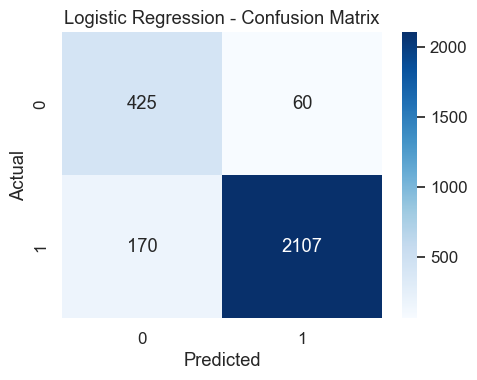

=== Random Forest Performance ===
Accuracy:  0.9370
Precision: 0.9523
Recall:    0.9723
F1-score:  0.9622
ROC-AUC:   0.9649

              precision    recall  f1-score   support

           0       0.86      0.77      0.81       485
           1       0.95      0.97      0.96      2277

    accuracy                           0.94      2762
   macro avg       0.90      0.87      0.89      2762
weighted avg       0.94      0.94      0.94      2762



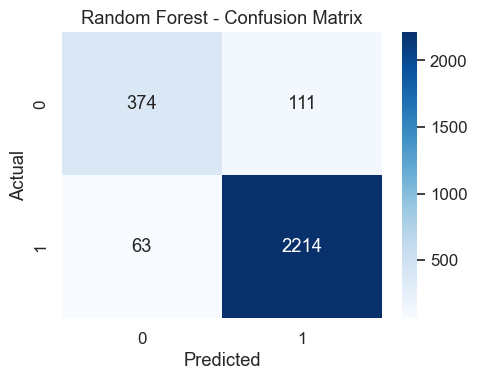

In [33]:
def evaluate_model(model, X_test, y_test, name="Model"):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]  #probability of class 1

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)

    print(f"=== {name} Performance ===")
    print(f"Accuracy:  {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall:    {rec:.4f}")
    print(f"F1-score:  {f1:.4f}")
    print(f"ROC-AUC:   {auc:.4f}\n")

    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.savefig(f"images/sup/{name}_confusion_matrix.png")
    plt.show()

    return {
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1-score": f1,
        "ROC-AUC": auc
    }

#evaluate both models
log_results = evaluate_model(
    log_reg, X_test, y_test, name="Logistic Regression")
rf_results = evaluate_model(rf, X_test, y_test, name="Random Forest")

## Supervised Learning Results & Interpretation
Model Performance Summary

Two supervised learning models were trained to predict Trust in AI in Healthcare using demographic features and attitudinal responses (Q1-Q20):
- Logistic Regression
- Random Forest Classifier

Both models performed well, despite the target variable being highly imbalanced (82% trust vs. 18% distrust).

### Logistic Regression - Interpretation

Overall Performance
- Accuracy: 91.7%
- F1-score: 0.95
- ROC-AUC: 0.95

Confusion Matrix Interpretation

- Correctly predicted 425 cases of “No Trust” (class 0)
- Missed 60 cases of “No Trust” (false negatives)
- Correctly predicted 2107 cases of “Trust”
- Made 170 false positives

**Takeaway:**
Logistic Regression performs well and maintains strong recall for the majority class, but slightly struggles with the minority “No Trust” group.

### Random Forest - Interpretation

Overall Performance
- Accuracy: 93.7%
- F1-score: 0.96
- ROC-AUC: 0.96
  
Confusion Matrix Interpretation
- Correctly predicted 374 “No Trust” cases
- Only 63 false negatives
- Correctly predicted 2214 “Trust” cases
- Slight increase in false positives (111)

**Takeaway:**
The Random Forest improves recall for the minority class (people who distrust AI), while achieving the best overall F1-score and ROC-AUC. This suggests it captures more nuanced, nonlinear relationships between demographic factors and attitudes.

Comparing the Two Models
|Metric | Logistic Regression | Random Forest | Best  |
|----------|----------|----------|----------|
|Accuracy  | 0.917 | 0.937 | Random Forest |
|Recall (Trust=1) | 0.925 | 0.972 | Random Forest |
|Recall (No Trust=0) | 0.88 | 0.77 | Logistic Regression |
|F1-score | 0.948 | 0.962 | Random Forest |
|ROC-AUC | 0.953 | 0.965 | Random Forest |

**Key Insight**
- Random Forest is the strongest overall model, especially in capturing individuals who trust AI.
- Logistic Regression is slightly better at detecting distrust, suggesting the distrust group may be more linearly separable.

### High Level Interpretation

- Trust in AI in healthcare can be predicted with high accuracy from survey responses, demographics, and AI literacy.
- Random Forest uncovers nonlinear interactions, which may reflect complex belief-based patterns.

These findings align well with the unsupervised learning clusters, suggesting that underlying attitude segments also translate into distinct trust levels.

### Feature Importance Analysis
- Logistic Regression Coefficients
- Random Forest Feature Importances

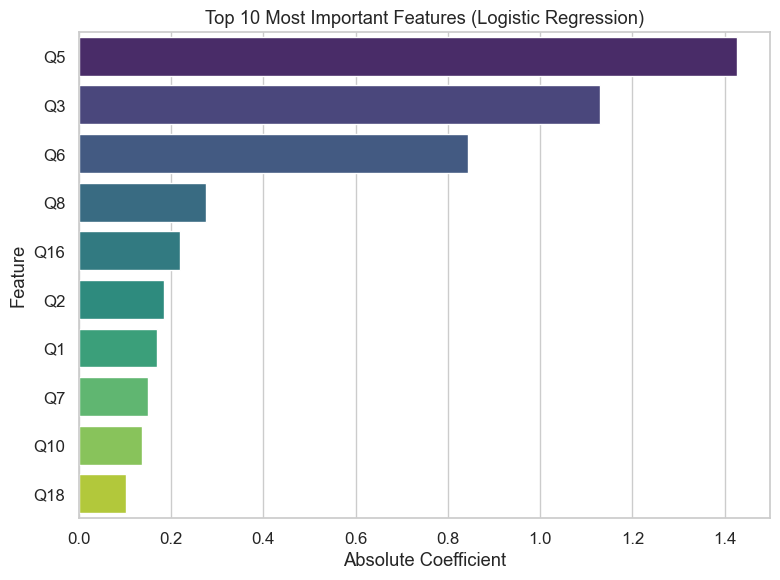

,Feature,Coefficient,Abs_Coefficient
3,Q5,1.427705,1.427705
2,Q3,1.129049,1.129049
4,Q6,0.844315,0.844315
6,Q8,0.276187,0.276187
14,Q16,-0.220326,0.220326
1,Q2,0.184667,0.184667
0,Q1,0.168955,0.168955
5,Q7,0.150067,0.150067
8,Q10,0.136712,0.136712
16,Q18,0.103140,0.103140


In [34]:
#coefficients for logistic regression
coef = log_reg.coef_[0]
feature_names = X_train.columns

lr_importance = pd.DataFrame({
    "Feature": feature_names,
    "Coefficient": coef
})

#sort by absolute importance
lr_importance["Abs_Coefficient"] = lr_importance["Coefficient"].abs()
lr_importance = lr_importance.sort_values("Abs_Coefficient", ascending=False)

#plot top 10
plt.figure(figsize=(8, 6))
sns.barplot(
    data=lr_importance.head(10),
    x="Abs_Coefficient",
    y="Feature",
    palette="viridis",
    hue="Feature",
    legend=False
)
plt.title("Top 10 Most Important Features (Logistic Regression)")
plt.xlabel("Absolute Coefficient")
plt.ylabel("Feature")
plt.tight_layout()
plt.savefig("images/sup/logistic_regression_feature_importance.png", dpi=300, bbox_inches='tight')
plt.show()

lr_importance.head(15)

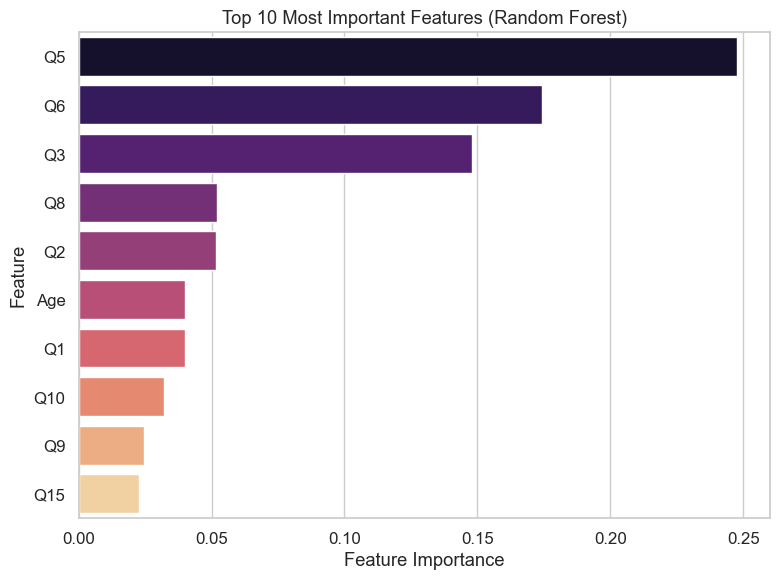

,Feature,Importance
3,Q5,0.247850
4,Q6,0.174315
2,Q3,0.148172
6,Q8,0.051891
1,Q2,0.051718
19,Age,0.040040
0,Q1,0.039961
8,Q10,0.032088
7,Q9,0.024518
13,Q15,0.022756


In [35]:
#extract feature importances
coef = rf.feature_importances_
feature_names = X_train.columns

rf_importance = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": coef
})

rf_importance = rf_importance.sort_values("Importance", ascending=False)

#plot top 10 features
plt.figure(figsize=(8, 6))
sns.barplot(
    data=rf_importance.head(10),
    x="Importance",
    y="Feature",
    palette="magma",
    hue="Feature",
    legend=False
)
plt.title("Top 10 Most Important Features (Random Forest)")
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.savefig("images/sup/random_forest_feature_importance.png", dpi=300, bbox_inches='tight')
plt.show()

rf_importance.head(15)

### Insights on Key Predictors of Trust in AI in Healthcare

To better understand which factors drive Trust in AI in Healthcare, both Logistic Regression and Random Forest feature importance scores were examined. Despite using different algorithms (linear vs. nonlinear), both models consistently highlight the same core predictors.

**Logistic Regression - Key Predictors**

Logistic Regression identifies the features with the strongest linear influence on predicting trust.

| Rank | Feature | Effect |
|------|---------|--------|
| 1 | Q5 | Strong positive predictor |
| 2 | Q3 | Positive predictor |
| 3 | Q6 | Positive predictor |
| 4 | Q8 | Positive predictor |
| 5 | Q16 | Negative predictor |



**Interpretation**
- Q5, Q3, and Q6 have the strongest coefficients, meaning they are the most influential attitude questions shaping trust.
- Importantly, these same questions appeared prominently in:
   - PCA loadings
   - Cluster profiling
   - Cluster 2 (high trust) attitudinal signatures
- Demographic variables (Gender, Age, Education) have minimal influence compared to attitude-based questions.

This suggests that beliefs, not demographics, are the dominant drivers of trust.


**Random Forest — Key Predictors**

Random Forest analyzes nonlinear relationships and interactions.
The importance rankings show remarkable consistency with Logistic Regression.

| Rank	| Feature	| Importance |
|-------|---------|------------|
| 1     | Q5      | 0.248      |
| 2     | Q6      | 0.174      |
| 3     | Q3      | 0.148      |
| 4     | Q8      | 0.052      |
| 5     | Q2      | 0.052      |
| 6–10  | Q1, Age, Q10, Q9, Q15 | Smaller but meaningful |


**Interpretation**
- Q5, Q6, Q3 again dominate the model — showing that these core attitude questions are robust predictors across methods.
- Age appears as a secondary contributor, but much weaker than attitudinal items.
- The alignment between RF and LR confirms that the trust-related structure in the dataset is stable and not model-dependent.

### Consistency With Unsupervised Learning

| Finding	| Unsupervised Learning	 | Supervised Learning |
|----------------|-----------------------|---------------------|
| Key attitude questions drive trust | PCA + clusters showed Q3, Q5, Q6 high loading | LR + RF identify Q3, Q5, Q6 as top predictors |
| High-trust vs. low-trust segments | Cluster 2 vs. Cluster 0 | Predicted Trust=1 vs Trust=0 |
| Demographics matter less | Age, Gender low in PCA/cluster differences | Very low feature importance |

### **Conclusion**
The supervised models validate the cluster structure discovered earlier.
Both SL and UL independently conclude:
- Trust in AI is overwhelmingly shaped by attitude questions, not demographics.
- Respondents form naturally separable groups based on these attitudes.

These findings provide a strong bridge into the broader discussion, demonstrating that both methods uncover the same underlying attitude structures. In the next section, we synthesize these insights and reflect on their implications for understanding public trust in AI in healthcare.


## Discussion

This project examined patient attitudes toward AI in healthcare using both unsupervised and supervised machine learning methods. The unsupervised analysis revealed distinct attitudinal clusters, ranging from cautious to highly supportive of AI. PCA showed that a small set of questions (particularly Q3, Q5, and Q6) contribute most strongly to variance in attitudes. K-Means clustering further demonstrated that these patterns form stable, interpretable groups.

Supervised learning models were then used to predict Trust in AI from the survey responses. Both Logistic Regression and Random Forest achieved strong predictive performance and identified the same attitude questions (Q3, Q5, Q6) as the primary drivers of trust. Importantly, demographic variables played a much smaller role, suggesting that trust is driven more by beliefs and perceived benefits or risks than by age, gender, or education.

The consistency between the unsupervised and supervised results enhances confidence in the findings. The high-trust cluster (Cluster 2) closely mirrors the respondents predicted by the supervised models to trust AI, while the cautious cluster (Cluster 0) aligns with predictions of distrust. This convergence indicates that the underlying attitudinal structure of the dataset is robust across methods.

Overall, this project demonstrates a meaningful segmentation of respondents and highlights the psychological, rather than demographic, nature of trust in AI for healthcare.

## Limitations & Future Work

### **Limitations**
- **Self-reported survey data** may include bias or social desirability effects.
- Some demographic values (e.g., Age, Gender) contain missing entries, which may impact comparisons.
- Attitude questions (Q1–Q20) are **ordinal Likert scale data**, yet PCA and K-Means treat them as continuous.
- Clustering results depend on scaling choices and the selected number of clusters (k).
- Dataset reflects respondents from multiple countries and healthcare systems but may not generalize globally.

### **Future Work**
- Apply clustering algorithms tailored for ordinal data (e.g., k-prototypes or Gower distance).
- Explore hierarchical or density-based clustering to identify substructures within attitude groups.
- Test alternative dimensionality reduction methods such as t-SNE or UMAP.
- Incorporate additional data such as provider experience, clinical role, or exposure to AI tools.
- Build predictive models incorporating interaction terms or explainability frameworks (e.g., SHAP).